<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/uts/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Liblary

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

## Mempersiapkan Gambar

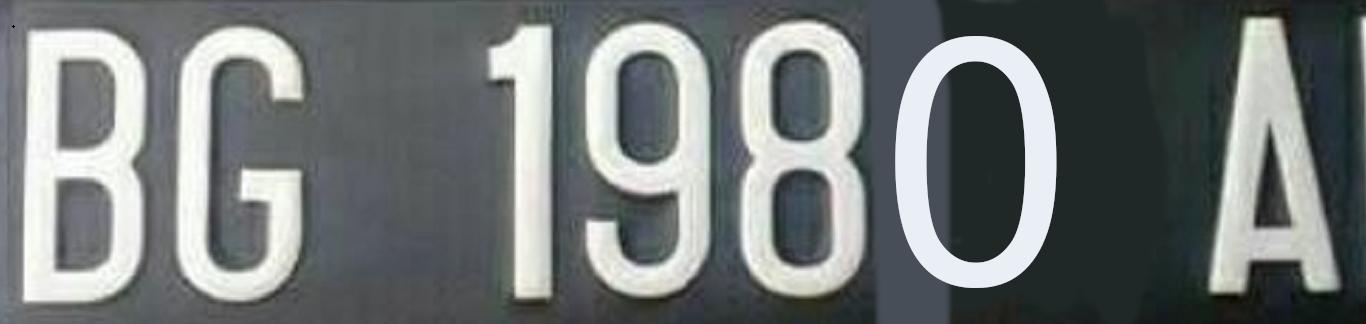

In [ ]:
# Load Gambar
img = cv2.imread('bg1.jpg')

# Tampilkan gambar
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

324
1366
3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(442584, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

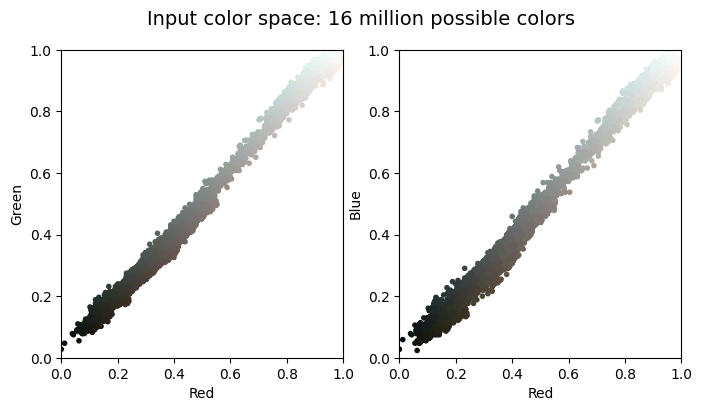

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Heatmap

## Cara Pertama

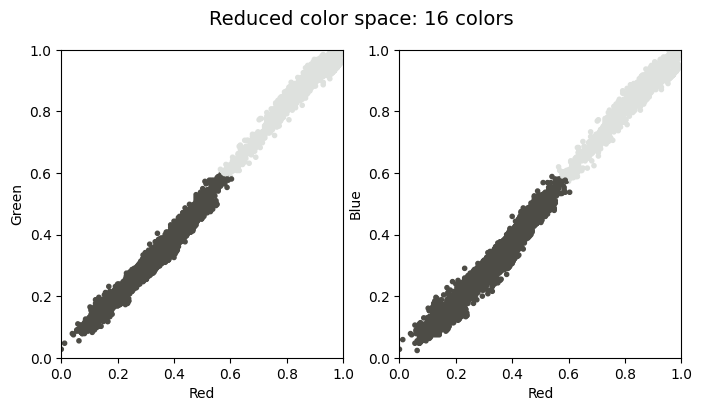

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

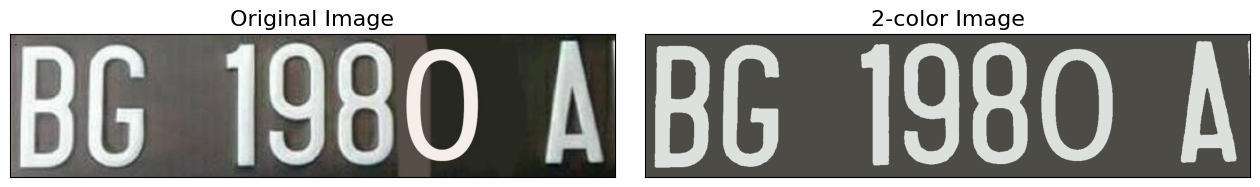

In [ ]:
recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored)
ax[1].set_title('2-color Image', size=16);

## Cara Kedua

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = img.reshape(-1,3)

In [ ]:
kmeans = KMeans(n_clusters = 2, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=10)

In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)

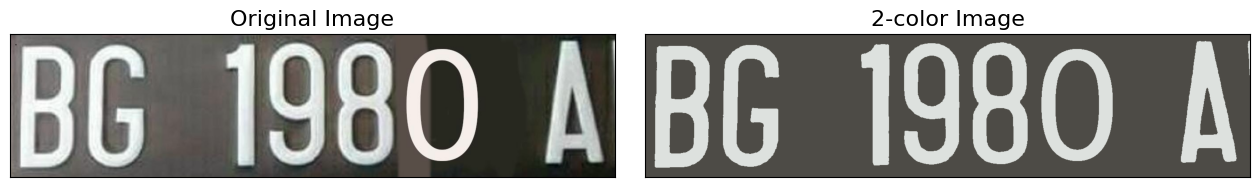

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_img)
ax[1].set_title('2-color Image', size=16);

## Bagaimana Jika Data

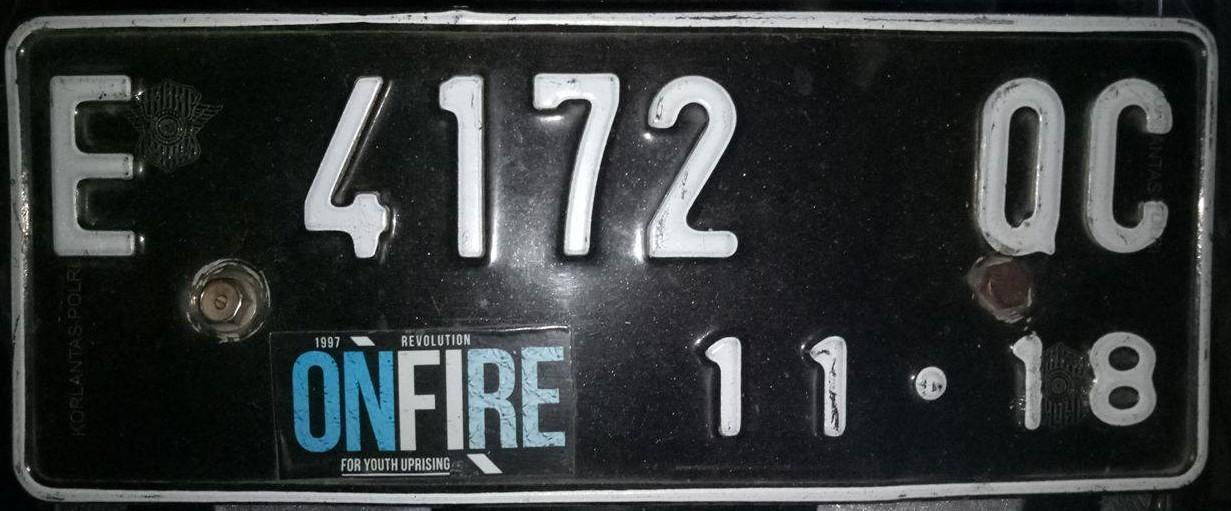

In [ ]:
# Load Gambar
img = cv2.imread('E.jpg')


# Tampilkan gambar
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

511
1231
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(629041, 3)

In [ ]:
kmeans = KMeans(n_clusters = 2, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=10)

In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)

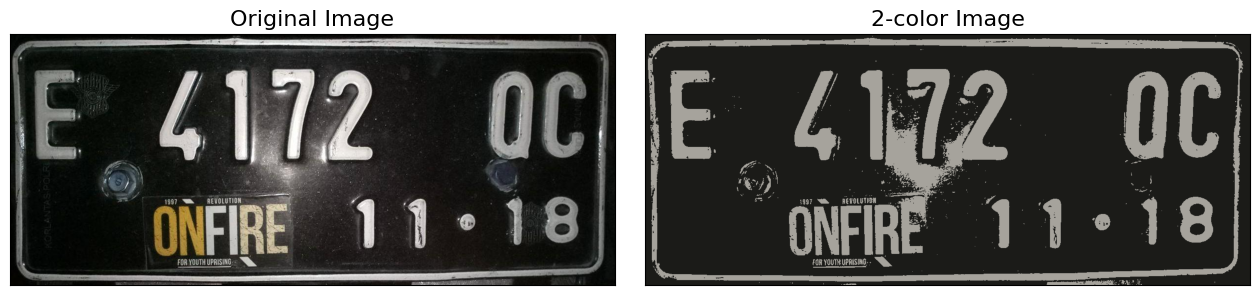

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_img)
ax[1].set_title('2-color Image', size=16);

## Solusi: Mengatur saturasi gambar

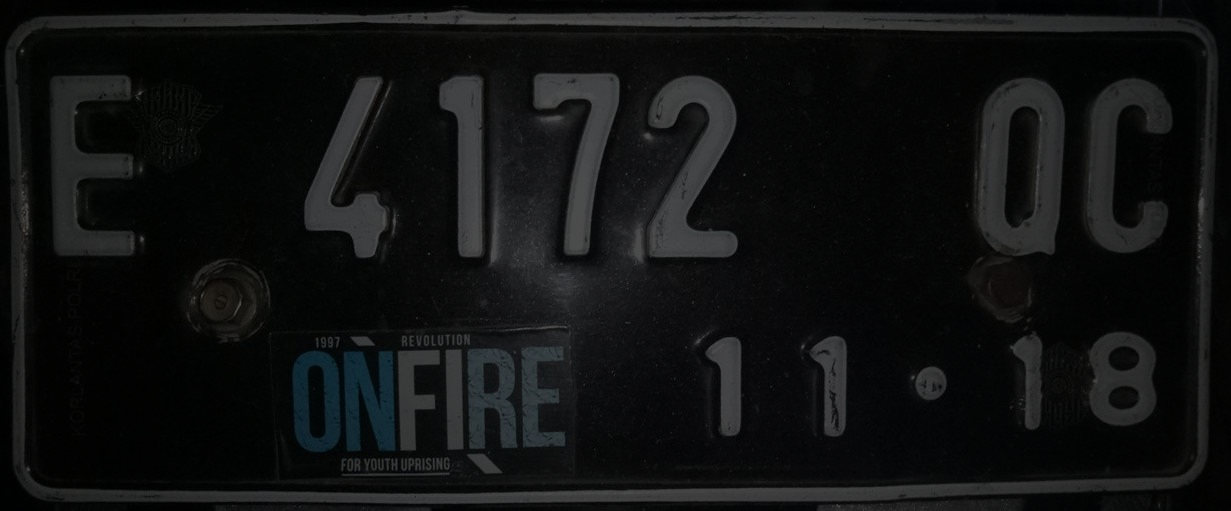

In [ ]:
import cv2

def reduce_saturation(image, factor):

 # Reduce the saturation of the image by factor
  desaturated_image = cv2.convertScaleAbs(image, alpha=factor)
  return desaturated_image


desaturated_image = reduce_saturation(img, 0.3)

# Display the desaturated image:

cv2_imshow(desaturated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored